Import Packages

In [63]:
#Basic
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Clsutering and Recommendations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
df = pd.read_csv('genres_v2.csv')
df.head()

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\3376641696.py:1: DtypeWarning:

Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [65]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

Data Cleaning

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42303 non-null  float64
 1   energy            42303 non-null  float64
 2   key               42303 non-null  int64  
 3   loudness          42303 non-null  float64
 4   mode              42303 non-null  int64  
 5   speechiness       42303 non-null  float64
 6   acousticness      42303 non-null  float64
 7   instrumentalness  42303 non-null  float64
 8   liveness          42303 non-null  float64
 9   valence           42303 non-null  float64
 10  tempo             42303 non-null  float64
 11  type              42303 non-null  object 
 12  id                42303 non-null  object 
 13  uri               42303 non-null  object 
 14  track_href        42303 non-null  object 
 15  analysis_url      42303 non-null  object 
 16  duration_ms       42303 non-null  int64 

In [67]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18595,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19675,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19676,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19677,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19678,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42299,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42300,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42301,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [68]:
#dropping rows with no song names and no uri and then dropping duplicates as well

# Drop rows with no song names and no URI
df = df.dropna(subset=['song_name', 'uri'])

# Remove duplicate rows based on 'song_name' and 'uri'
df = df.drop_duplicates(subset=['song_name', 'uri'])

# Get the count of final rows
final_row_count = len(df)

print("Count of final rows:", final_row_count)

Count of final rows: 18351


EDA

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1874282743.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




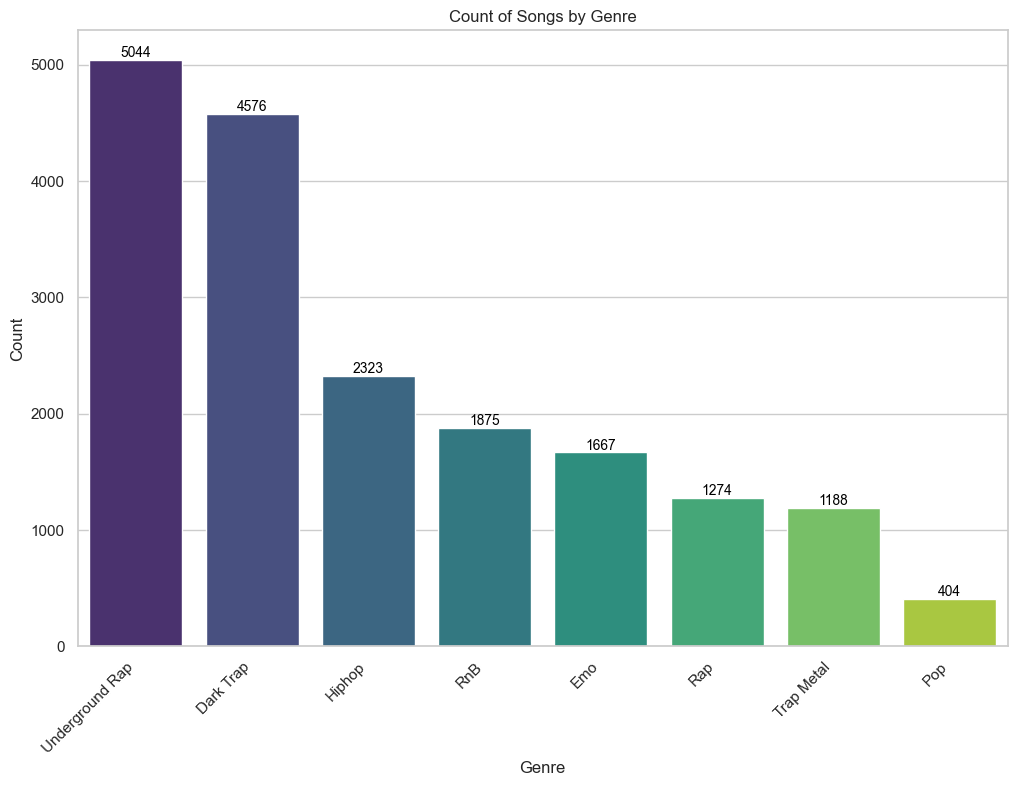

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a count plot with count labels using sns.countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()

In [70]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x='valence',
    y='energy',
    z='genre',
    color='genre',
    size_max=10,  # Set the maximum marker size
    opacity=0.7,  # Set marker opacity
    symbol='genre',  # Use different marker symbols for each genre
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Genre',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='Genre',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9),  # Set the initial view angle
        )
    )
)

# Show the plot
fig.show()

In [71]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21518,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21519,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21520,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


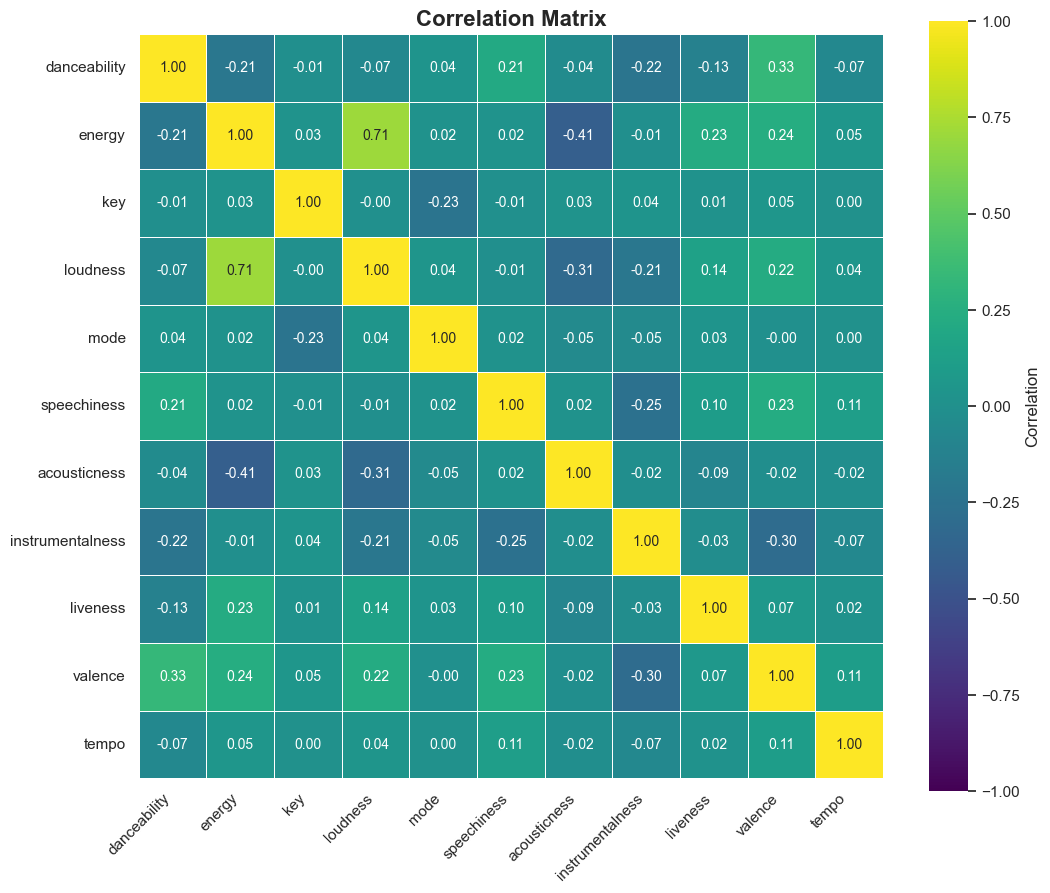

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Selecting only numeric columns from the DataFrame
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))

# Use the 'coolwarm' colormap with the same color palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)
plt.show()

In [73]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18351 entries, 0 to 21521
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18351 non-null  float64
 1   energy            18351 non-null  float64
 2   key               18351 non-null  int64  
 3   loudness          18351 non-null  float64
 4   mode              18351 non-null  int64  
 5   speechiness       18351 non-null  float64
 6   acousticness      18351 non-null  float64
 7   instrumentalness  18351 non-null  float64
 8   liveness          18351 non-null  float64
 9   valence           18351 non-null  float64
 10  tempo             18351 non-null  float64
 11  uri               18351 non-null  object 
 12  genre             18351 non-null  object 
 13  song_name         18351 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


K Means Technique


In [74]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\2065314466.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,1.020622,0.868944,-0.856587,-0.096147,0.854068,1.734790,-0.515968,-0.302685,-0.922007,-0.127673,0.159625,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.329334,-0.932618,0.773869,-0.050960,0.854068,-0.680441,1.095459,-0.360468,-0.508391,-1.257266,-1.285607,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.137894,1.312319,-0.041359,0.774204,0.854068,-0.801699,-0.733218,-0.360451,1.175236,-1.619162,2.265653,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.170515,0.683736,-1.400073,0.798821,0.854068,-0.513091,-0.686462,-0.360468,-0.534905,-1.039872,1.192998,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.816939,-0.197401,-0.856587,-0.198660,0.854068,0.834219,0.226459,-0.360468,-0.190225,0.733375,-0.150666,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,-0.861904,0.897006,0.502127,0.118321,0.854068,0.869675,-0.788664,-0.360454,0.936611,0.690749,0.260504,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21518,-0.787837,0.897006,-1.128330,0.100786,0.854068,2.068072,-0.758060,-0.360468,-0.422221,-0.711651,0.273919,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21519,-1.547020,-0.623940,0.502127,-0.500468,0.854068,0.777490,0.259519,-0.360468,-0.481877,0.464831,0.066059,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21520,0.736700,-0.062705,0.502127,0.057960,0.854068,0.734944,-0.724245,-0.351930,-0.627703,0.371053,1.096845,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


K-Means Clustering without PCA


C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\2024117361.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



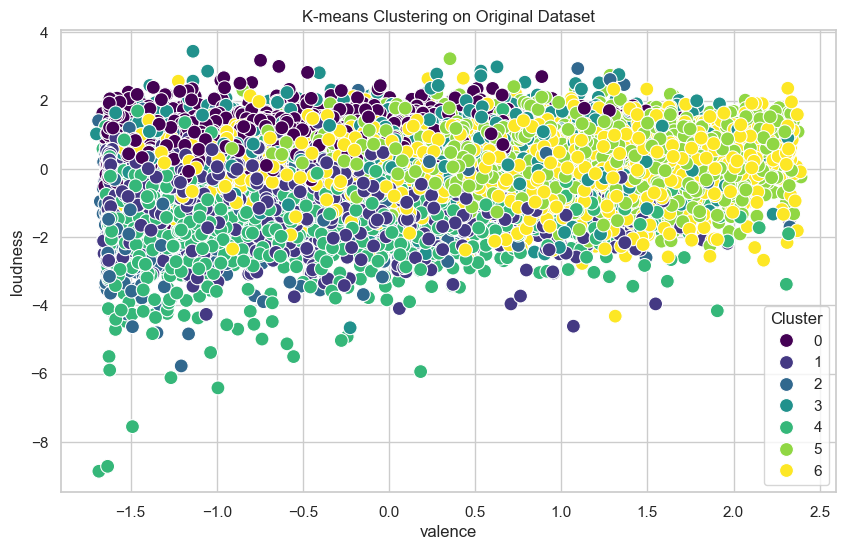

In [75]:

X = filtered_df.drop(['uri','genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 7

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()

Clustering with PCA&Means
<!-- Performing Principal Component Analysis on the dataset filtered_df reduces its dimensionality and visualize the explained variance ratio. -->

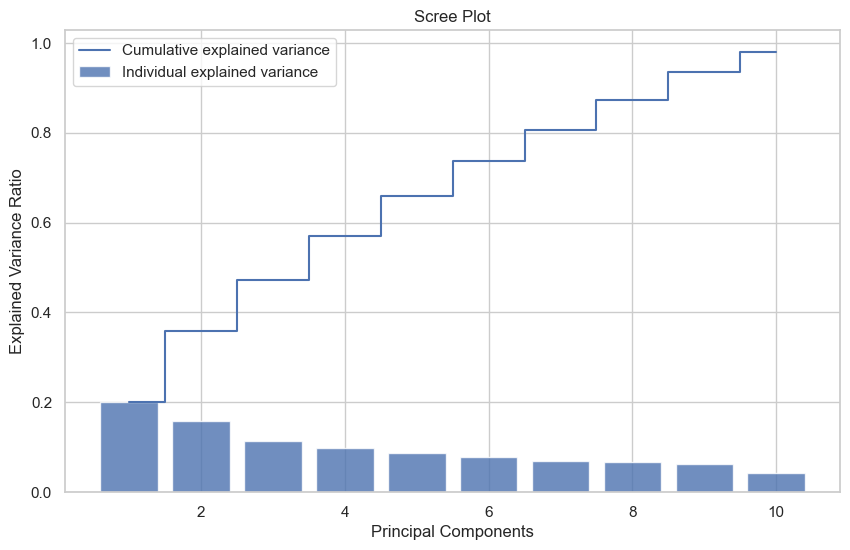

In [76]:
# Perform PCA
n_components = 10  # Adjust the value based on the number of clusters
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


In [77]:
# 4. Perform PCA
n_components = 6  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[-0.74723731, -1.23866254, -1.2300971 , -0.19462445, -0.48119579,
        -0.86786605],
       [ 1.56773282,  0.0729385 , -0.32547015, -0.87777934,  0.7385867 ,
         1.00829372],
       [-1.44573444,  0.7424725 , -0.74204067,  1.01722188, -1.04308799,
        -0.93217147],
       ...,
       [ 0.44868863, -0.23462815, -0.07710412,  0.9150175 , -0.07486097,
         0.47141932],
       [-0.58531636, -1.08220384, -0.2157438 ,  0.10494913, -1.06294602,
        -0.87611648],
       [-1.18098496, -0.88273421,  0.73857491,  0.21350495, -1.29003438,
         0.41290772]])

C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\3536022978.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



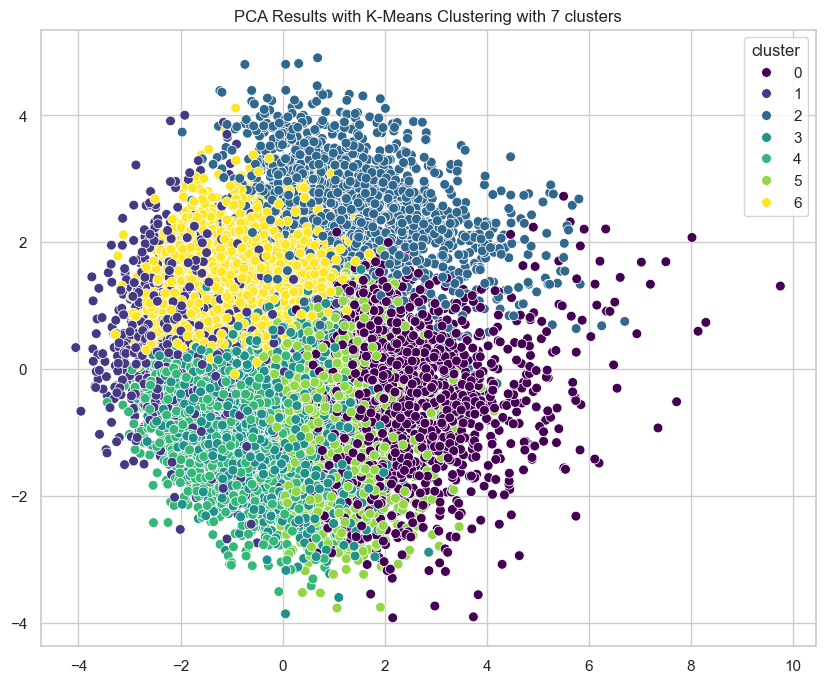

In [78]:
# 5. K-Means Clustering on PCA Results
n_clusters = 7 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [79]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster
0,1.020622,0.868944,-0.856587,-0.096147,0.854068,1.734790,-0.515968,-0.302685,-0.922007,-0.127673,0.159625,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,4
1,0.329334,-0.932618,0.773869,-0.050960,0.854068,-0.680441,1.095459,-0.360468,-0.508391,-1.257266,-1.285607,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,5
2,1.137894,1.312319,-0.041359,0.774204,0.854068,-0.801699,-0.733218,-0.360451,1.175236,-1.619162,2.265653,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,6
3,-1.170515,0.683736,-1.400073,0.798821,0.854068,-0.513091,-0.686462,-0.360468,-0.534905,-1.039872,1.192998,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),6
4,0.816939,-0.197401,-0.856587,-0.198660,0.854068,0.834219,0.226459,-0.360468,-0.190225,0.733375,-0.150666,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,-0.861904,0.897006,0.502127,0.118321,0.854068,0.869675,-0.788664,-0.360454,0.936611,0.690749,0.260504,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",1
21518,-0.787837,0.897006,-1.128330,0.100786,0.854068,2.068072,-0.758060,-0.360468,-0.422221,-0.711651,0.273919,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6
21519,-1.547020,-0.623940,0.502127,-0.500468,0.854068,0.777490,0.259519,-0.360468,-0.481877,0.464831,0.066059,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,5
21520,0.736700,-0.062705,0.502127,0.057960,0.854068,0.734944,-0.724245,-0.351930,-0.627703,0.371053,1.096845,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,4


EDA on clusters and assigning them moods

In [80]:
filtered_df_pca['cluster'].value_counts()

3    4106
4    3227
5    3219
6    3029
0    1831
2    1559
1    1380
Name: cluster, dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1006300820.py:14: UserWarning:

Ignoring `palette`

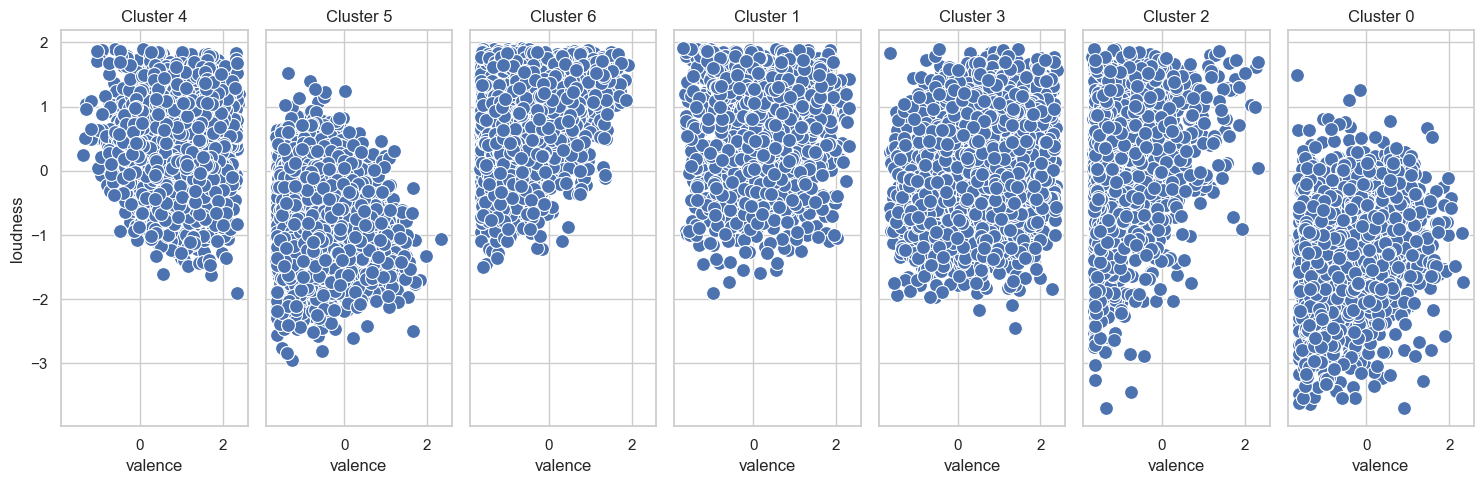

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()

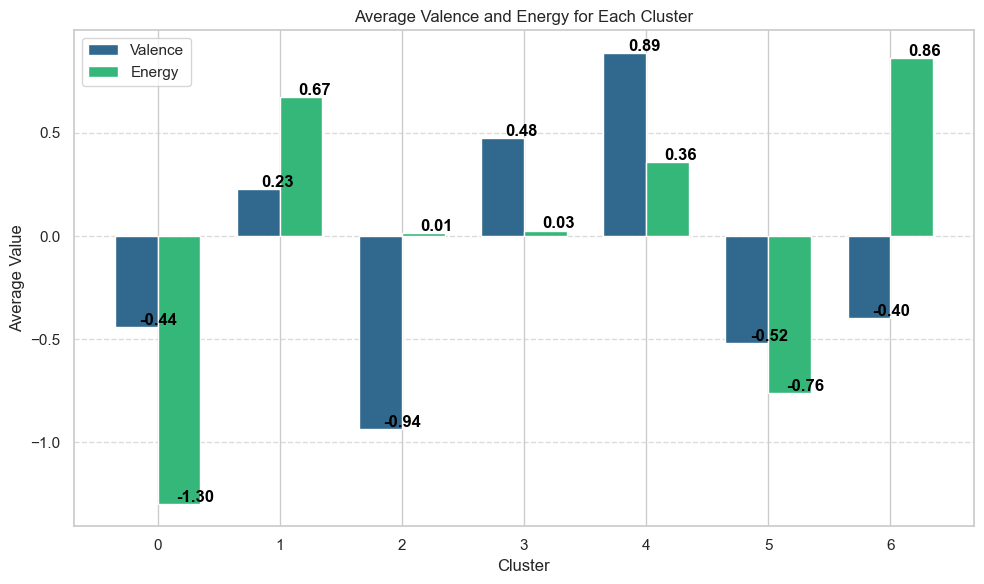

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', 2)

# Plotting the average 'valence' and 'energy' for each cluster in grouped bars
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [83]:
#Label each cluster with specific mood

filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Surprised', np.nan)
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Angry', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Happy', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Disgust', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 4, 'Sad', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 5, 'Fear', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 6, 'Neutral', filtered_df_pca['mood'])

filtered_df_pca

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1889636705.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1889636705.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hi\AppData\Local\Temp\ipykernel_16992\1889636705.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020622,0.868944,-0.856587,-0.096147,0.854068,1.734790,-0.515968,-0.302685,-0.922007,-0.127673,0.159625,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,4,Sad
1,0.329334,-0.932618,0.773869,-0.050960,0.854068,-0.680441,1.095459,-0.360468,-0.508391,-1.257266,-1.285607,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,5,Fear
2,1.137894,1.312319,-0.041359,0.774204,0.854068,-0.801699,-0.733218,-0.360451,1.175236,-1.619162,2.265653,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,6,Neutral
3,-1.170515,0.683736,-1.400073,0.798821,0.854068,-0.513091,-0.686462,-0.360468,-0.534905,-1.039872,1.192998,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),6,Neutral
4,0.816939,-0.197401,-0.856587,-0.198660,0.854068,0.834219,0.226459,-0.360468,-0.190225,0.733375,-0.150666,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,4,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,-0.861904,0.897006,0.502127,0.118321,0.854068,0.869675,-0.788664,-0.360454,0.936611,0.690749,0.260504,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",1,Angry
21518,-0.787837,0.897006,-1.128330,0.100786,0.854068,2.068072,-0.758060,-0.360468,-0.422221,-0.711651,0.273919,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6,Neutral
21519,-1.547020,-0.623940,0.502127,-0.500468,0.854068,0.777490,0.259519,-0.360468,-0.481877,0.464831,0.066059,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,5,Fear
21520,0.736700,-0.062705,0.502127,0.057960,0.854068,0.734944,-0.724245,-0.351930,-0.627703,0.371053,1.096845,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,4,Sad


EDA on the moods



Number of songs assigned to each mood

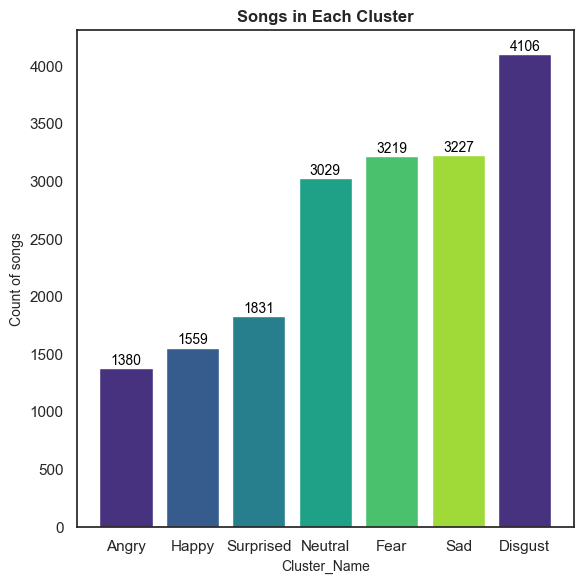

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style without gridlines
sns.set(style="white")

# Get value counts of each unique value in 'cluster' column
cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(6, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

# Display count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

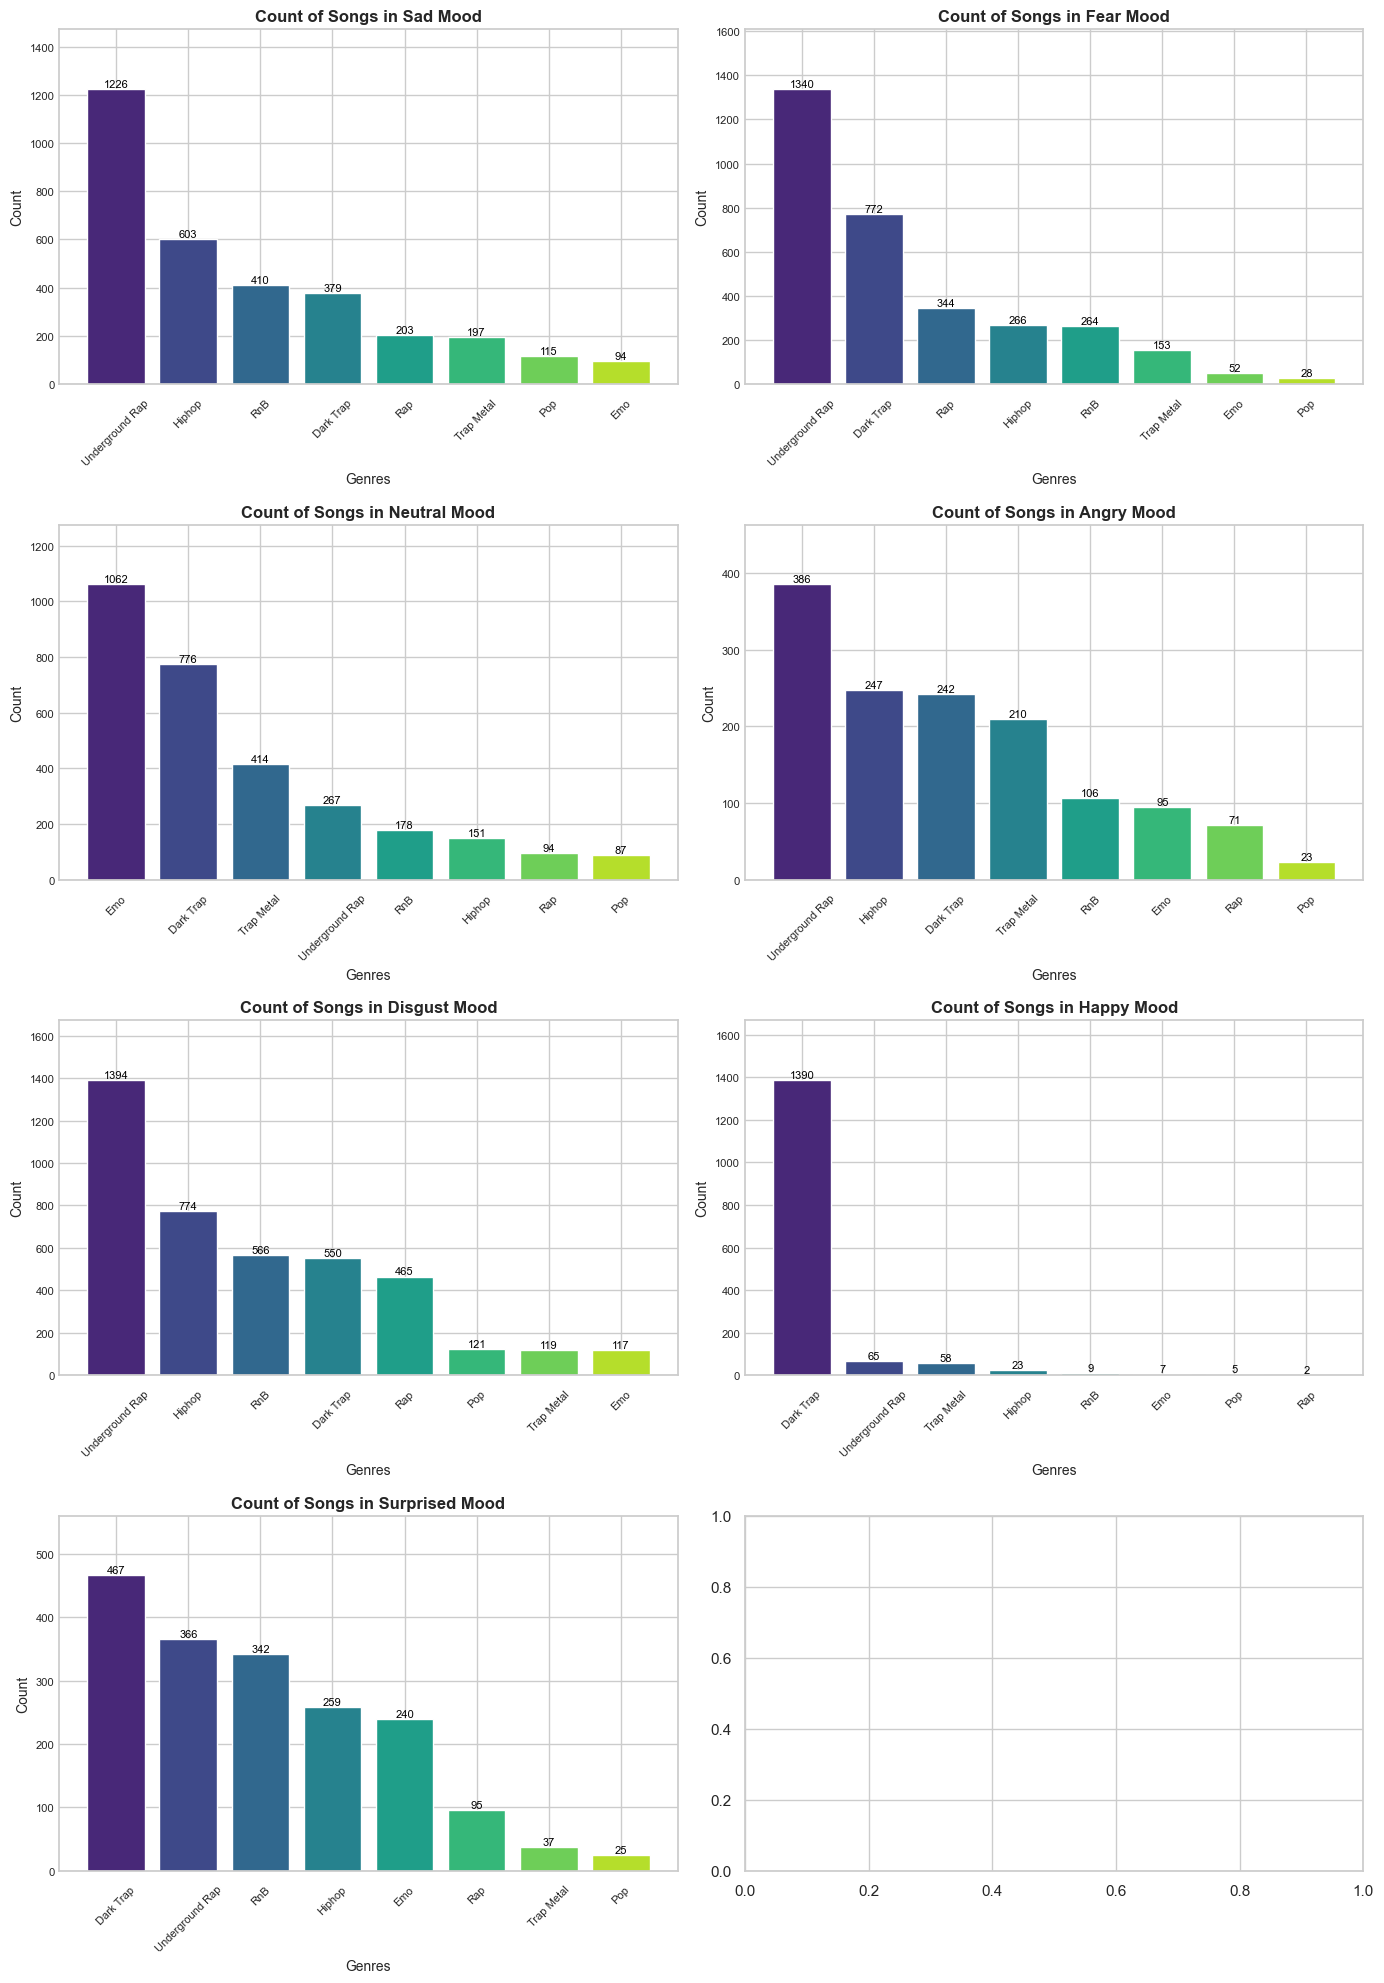

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

    # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


Percentage (of total number of songs in each genre) of songs of genres in each mood

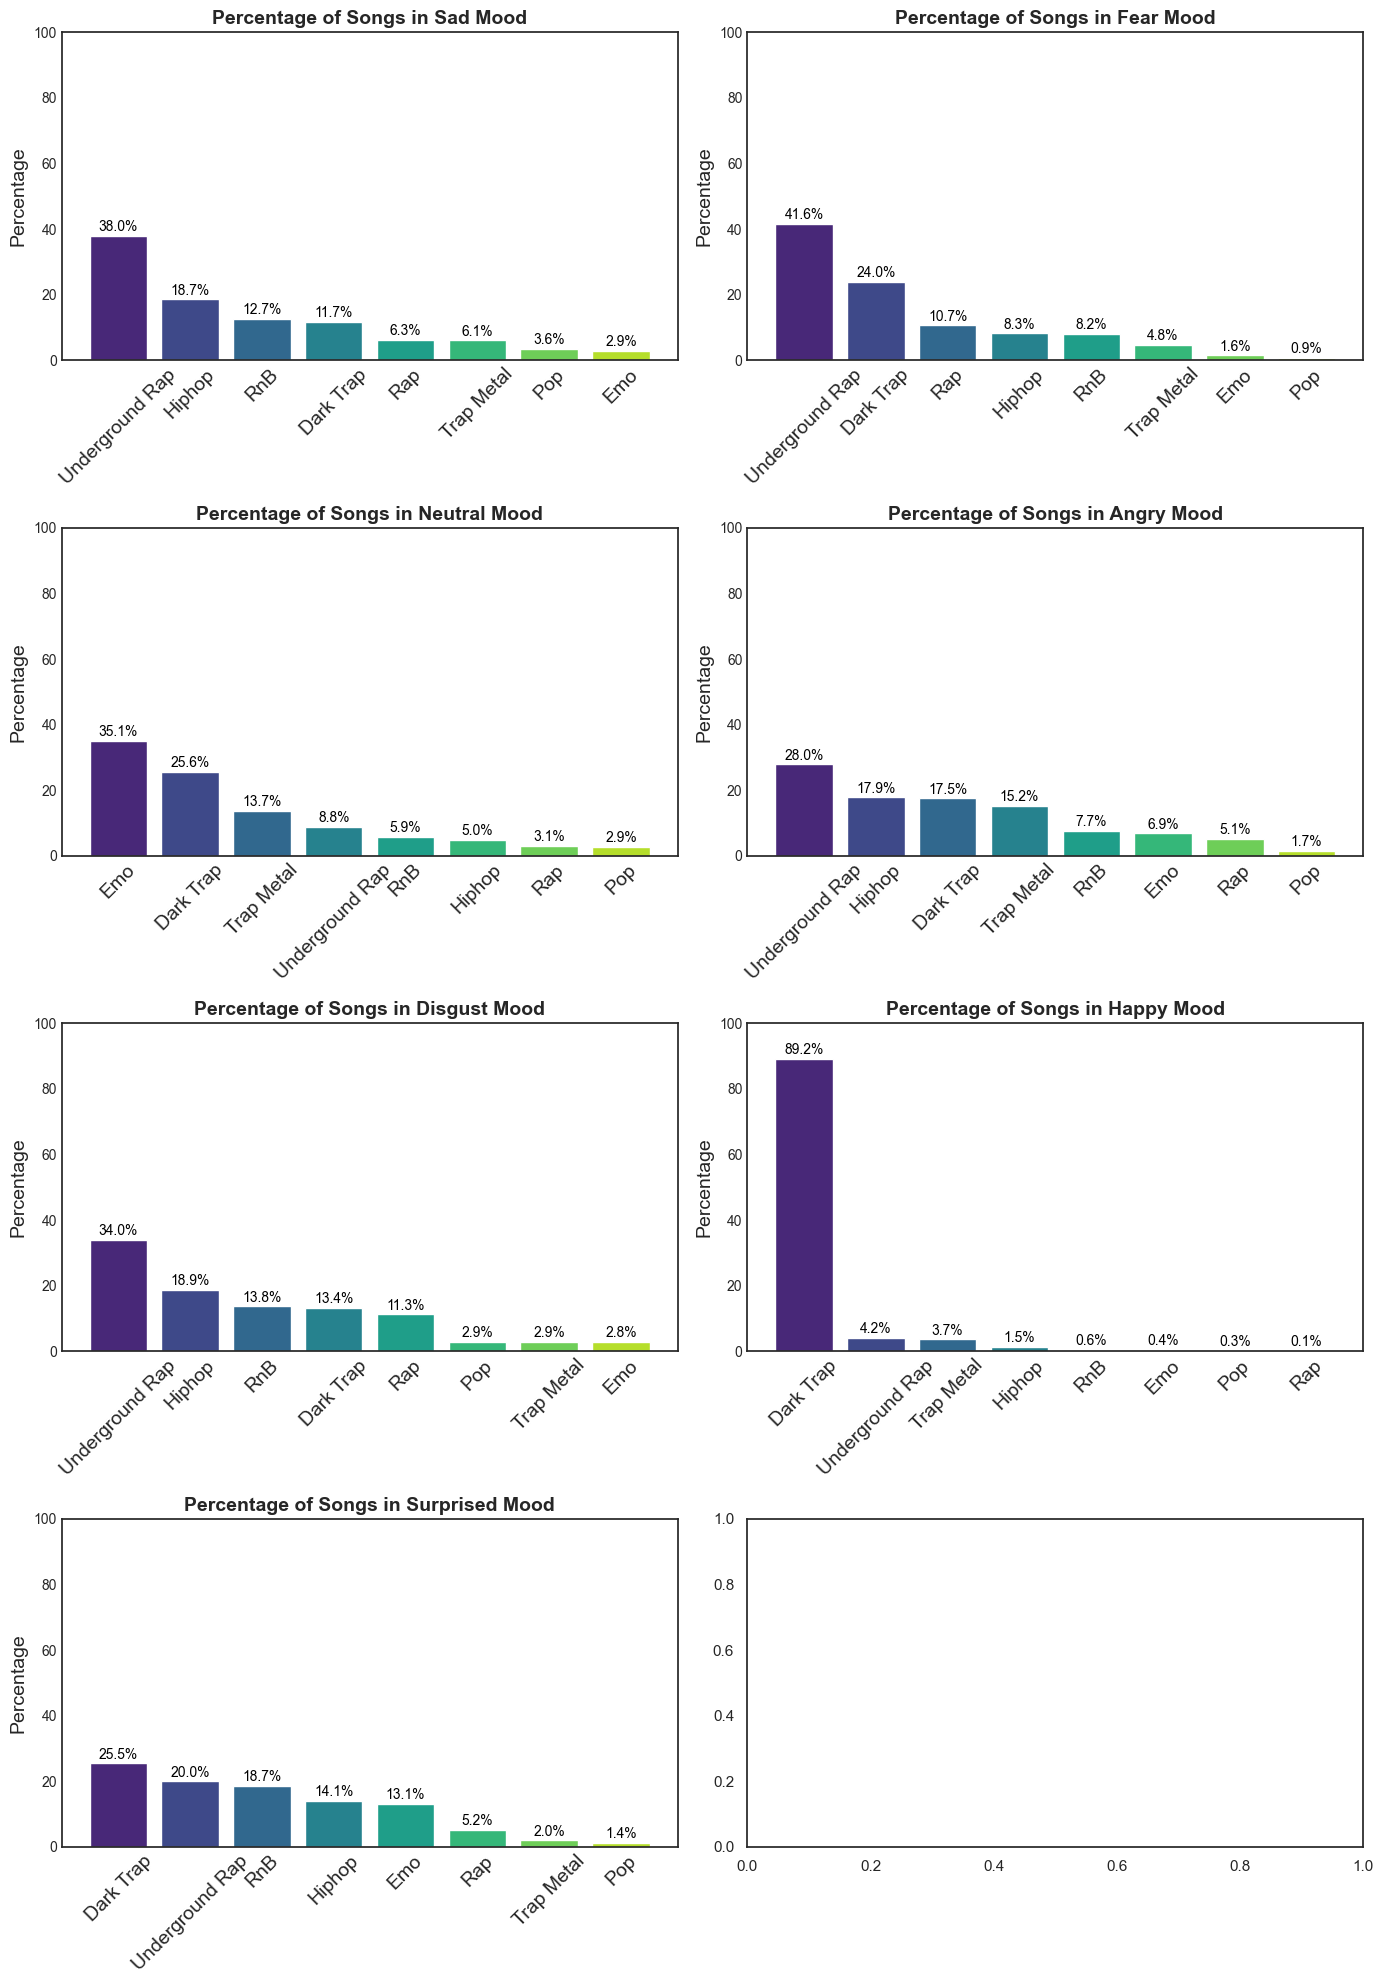

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="white")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values / genre_counts.sum() * 100, color=colors)

    axes[row, col].set_title(f'Percentage of Songs in {mood} Mood', fontsize=14, fontweight='bold')
    #axes[row, col].set_xlabel('Genres', fontsize=12)
    axes[row, col].set_ylabel('Percentage', fontsize=14)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='both', which='both', length=0)  # Remove ticks
    axes[row, col].set_ylim(0, 100)

    # Display percentages above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


Fetch Songs from Spotify API

In [87]:
! pip install spotipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [88]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics.pairwise import cosine_similarity
import webbrowser

# Initialize Spotify client
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="8259db9b0e8d4ac89d8d84833e6516ac",
                                               client_secret="009fcd47eca64b3cb5d993e3cf94b422",
                                               redirect_uri="http://localhost:8000",
                                               scope="user-library-read playlist-modify-public user-modify-playback-state"), requests_timeout=10, retries=10)

# Define the filtered_df_pca DataFrame or ensure it is accessible here

# Function to recommend songs based on detected mood
def recommend_songs_by_mood(detected_mood, filtered_df_pca):
    # Filter DataFrame based on detected mood
    filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]
    # Select 10 random songs from the filtered DataFrame
    random_songs = filtered_by_mood.sample(26)
    return random_songs

# Detected mood (for testing purpose)
detected_mood = 'Disgust'

# Get recommended songs
recommended_songs = recommend_songs_by_mood(detected_mood, filtered_df_pca)

# Function to create playlist and add recommended songs
def create_and_add_to_playlist(songs_df, playlist_name):
    # Create a new playlist
    playlist = sp.user_playlist_create(sp.current_user()['id'], playlist_name, public=True)
    # Extract URIs of recommended songs
    uris = songs_df['uri'].tolist()
    # Add songs to the playlist
    sp.playlist_add_items(playlist['id'], uris)
    # Get Spotify URI of the created playlist
    playlist_uri = sp.user_playlist(sp.current_user()['id'], playlist['id'])['uri']
    return f"spotify:playlist:{playlist_uri.split(':')[-1]}"

# Create a playlist and add recommended songs
playlist_name = f"Recommended Songs for {detected_mood}"
playlist_uri = create_and_add_to_playlist(recommended_songs, playlist_name)

# Start playback of the playlist on the specified device
device_id = "d50f61d10230b0d4627f7d0ba4b050203a75e2be"
sp.start_playback(device_id=device_id, context_uri=playlist_uri)

print("Playlist created successfully.")
print("Spotify URI for the playlist:", playlist_uri)


Playlist created successfully.
Spotify URI for the playlist: spotify:playlist:6dhwqR4T7r7BHqSgFHyS5u


In [89]:
# #Suggest 10 random songs based on mood detected

# # Detected mood

# # import emo_model
# # detected_mood = emo_model.record_video(5) #input the number of seconds for which the video has to be recorded

# detected_mood = 'Happy'

# # Filter DataFrame based on detected mood
# filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]

# # Select 5 random songs from the filtered DataFrame
# random_songs = filtered_by_mood.sample(10)['song_name']

# print("Detected mood is:", detected_mood)
# print("Random songs based on detected mood:")
# print(random_songs)

In [90]:
# import pandas as pd
# import ipywidgets as widgets
# from sklearn.metrics.pairwise import cosine_similarity

# # Initialize top_recommendation_uri as a global variable
# top_recommendation_uri = None

# # Create a dropdown widget for song selection
# song_dropdown = widgets.Dropdown(
#     options=random_songs,
#     description='Select a song:'
# )

# # Display the dropdown widget
# display(song_dropdown)

# # Function to handle song selection
# def on_song_selection(change):
#     global top_recommendation_uri

#     selected_song = change.new
#     print(f"You selected: {selected_song}")

#     if selected_song in filtered_by_mood['song_name'].values:
#         selected_song_uri = filtered_by_mood.loc[filtered_by_mood['song_name'] == selected_song, 'uri'].values[0]
#         print(f"URI of selected song: {selected_song_uri}")

# # Registering the function to observe changes in the dropdown value
# song_dropdown.observe(on_song_selection, names='value')


In [91]:
# import spotipy
# from spotipy.oauth2 import SpotifyOAuth

# sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="8259db9b0e8d4ac89d8d84833e6516ac",
#                                                client_secret="009fcd47eca64b3cb5d993e3cf94b422",
#                                                redirect_uri="http://localhost:8000",
#                                                scope="user-read-playback-state streaming ugc-image-upload playlist-modify-public"),requests_timeout=10, retries=10)

# # track_uri = "spotify:track:1VjBtVpj9cZsYcQQYII0vY"
# # sp.start_playback(uris=[track_uri])

# # devices = sp.devices()
# # print(devices)
# # device_ids = [device['id'] for device in devices['devices']]
# # print(device_ids)

# device_id = "d50f61d10230b0d4627f7d0ba4b050203a75e2be" #device id for desktop
# #device_id = "bb96475e5778aeafafa2b54b0f9e951423d07436" #device id for iphone
# track_uri = "spotify:track:1VjBtVpj9cZsYcQQYII0vY"

# sp.start_playback(device_id=device_id, uris=[track_uri])

In [92]:
# import spotipy
# from spotipy.oauth2 import SpotifyOAuth
# import pandas as pd
# import ipywidgets as widgets
# from sklearn.metrics.pairwise import cosine_similarity

# # Initialize Spotify client
# sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="8259db9b0e8d4ac89d8d84833e6516ac",
#                                                client_secret="009fcd47eca64b3cb5d993e3cf94b422",
#                                                redirect_uri="http://localhost:8000",
#                                                scope="user-library-read playlist-modify-public"), requests_timeout=10, retries=10)

# # Define the filtered_df_pca DataFrame or ensure it is accessible here

# # Function to recommend songs based on detected mood
# def recommend_songs_by_mood(detected_mood, filtered_df_pca):
#     # Filter DataFrame based on detected mood
#     filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]
#     # Select 10 random songs from the filtered DataFrame
#     random_songs = filtered_by_mood.sample(26)
#     return random_songs

# # Detected mood (for testing purpose)
# detected_mood = 'Fear'

# # Get recommended songs
# recommended_songs = recommend_songs_by_mood(detected_mood, filtered_df_pca)

# # Function to create playlist and add recommended songs
# def create_and_add_to_playlist(songs_df, playlist_name):
#     # Create a new playlist
#     playlist = sp.user_playlist_create(sp.current_user()['id'], playlist_name, public=True)
#     # Extract URIs of recommended songs
#     uris = songs_df['uri'].tolist()
#     # Add songs to the playlist
#     sp.playlist_add_items(playlist['id'], uris)

# # Create a playlist and add recommended songs
# playlist_name = f"Recommended Songs for 01 {detected_mood}"
# create_and_add_to_playlist(recommended_songs, playlist_name)

# # Get Spotify URI of the created playlist
# playlist_uri = sp.user_playlist(sp.current_user()['id'], playlist_name)['uri']
# spotify_playlist_uri = f"spotify:playlist:{playlist_uri.split(':')[-1]}"

# print("Playlist created successfully.")
# print("Spotify URI for the playlist:", spotify_playlist_uri)
